In [ ]:
#在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。

#Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
#Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
#Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
#提示:
#1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態
#2.把題目中的 Survived 用 Survived_cate 來做分析
#3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。

In [17]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import sklearn
print(sklearn.__version__)
#如果只有 0.19 記得要更新至 最新版本
%matplotlib inline

0.23.2


In [18]:
df_train=pd.read_csv("Titanic_train.csv")

In [13]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
cat_features = []
for dtype, feature in zip(df_train.dtypes,df_train.columns):
    if dtype == 'object':
        cat_features.append(feature)
print(f'{len(cat_features)} category Features : {cat_features}\n')

5 category Features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



In [23]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_train= df_train.replace('null',np.NaN)
# 統計 data 裡每一列是否有空值
print(df_train.isnull().any())

# 統計 data 裡有空值的變數個數
print(df_train.isnull().any().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Sex_female     False
Sex_male       False
dtype: bool
3


29.69911764705882
14.526497332334044


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


29.581560044893376
14.554589813600963


/Users/wenchiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


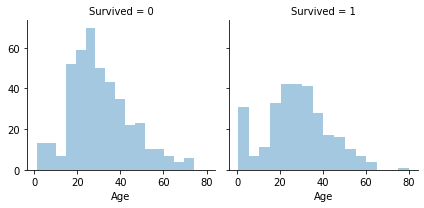

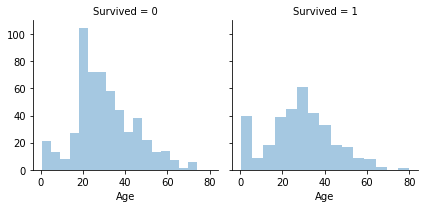

In [24]:
# 我們以  Age 為例，進行，由後往前補
#補值前 平均值

print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)
#補值後
df_train['Age']=df_train['Age'].fillna(method='pad')
print(df_train['Age'].mean())
print(df_train['Age'].std()) #age標準差
df_train[df_train['Age'].isnull().values==True]
#補平均數，平均數上沒有差異性，標準差接近
# 連續型用分布圖行來看
g = sns.FacetGrid(df_train, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

In [21]:
from sklearn.preprocessing import OneHotEncoder
pf = pd.get_dummies(df_train[['Sex']])
df_train = pd.concat([df_train, pf], axis=1)
df_train.drop(['Sex'], axis=1, inplace=True)

df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [25]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(df_train['Age'], df_train['Survived'])
print(corr)


-0.06557129687324229


In [27]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(df_train['Sex_male'], df_train['Survived'])
print(corr)

-0.543351380657755


In [28]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(df_train['Sex_female'], df_train['Survived'])
print(corr)

0.5433513806577551


In [29]:
# 由於 pearsonr 有兩個回傳結果，我們只需取第一個回傳值為相關係數
corr, _=stats.pearsonr(df_train['Age'], df_train['Fare'])
print(corr)

0.08341713026537374


In [30]:
#Ans1-3: Age & Survived; Age & Fare 較無相關。Sex and Survived  中度相關。

In [31]:
new_train=df_train.astype({'Survived': 'object'}).dtypes

In [32]:
new_train

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_female       uint8
Sex_male         uint8
dtype: object

In [34]:
#如果沒有安裝過，先把下一行程式碼打開，先安裝套件 
!pip install researchpy

import researchpy   
# https://researchpy.readthedocs.io/

In [37]:
contTable = pd.crosstab(new_train['Age'], new_train['Sex_male'])
contTable

ValueError: If using all scalar values, you must pass an index